In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
import datetime

In [4]:
df=pd.read_csv("dailyclimate.csv")

In [5]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,01-01-2013,10.000000,84.500000,0.000000,1015.666667
1,02-01-2013,7.400000,92.000000,2.980000,1017.800000
2,03-01-2013,7.166667,87.000000,4.633333,1018.666667
3,04-01-2013,8.666667,71.333333,1.233333,1017.166667
4,05-01-2013,6.000000,86.833333,3.700000,1016.500000


In [6]:
df.shape

(1462, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [8]:
df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [9]:
df["date"]=pd.to_datetime(df["date"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [11]:
df["date"].min(),df["date"].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-01-01 00:00:00'))

In [12]:
cols=["humidity","wind_speed","meanpressure"]
df.drop(cols,axis=1,inplace=True)

In [13]:
df=df.sort_values("date")

In [14]:
df=df.groupby("date")["meantemp"].sum().reset_index()

In [15]:
df["date"]=pd.to_datetime(df["date"])
df.set_index("date",inplace=True)
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='date', length=1462, freq=None)

In [16]:
df.sort_index(inplace=True)
df.head(10)

,meantemp
date,
2013-01-01,10.000000
2013-01-02,16.000000
2013-01-03,17.333333
2013-01-04,25.375000
2013-01-05,31.857143
2013-01-06,32.000000
2013-01-07,33.857143
2013-01-08,30.000000
2013-01-09,30.000000


In [39]:
y=df["meantemp"].resample("MS").mean()

In [40]:
y

date
2013-01-01    17.859677
2013-02-01    20.518963
2013-03-01    24.096544
2013-04-01    27.797183
2013-05-01    30.956528
2013-06-01    28.480556
2013-07-01    28.160599
2013-08-01    27.556260
2013-09-01    27.819762
2013-10-01    24.912404
2013-11-01    20.901389
2013-12-01    18.212750
2014-01-01    18.438940
2014-02-01    19.758929
2014-03-01    24.208525
2014-04-01    27.615939
2014-05-01    29.175996
2014-06-01    30.666667
2014-07-01    29.326037
2014-08-01    29.368088
2014-09-01    28.357645
2014-10-01    24.955645
2014-11-01    21.108929
2014-12-01    16.887097
2015-01-01    17.512673
2015-02-01    22.903061
2015-03-01    24.156682
2015-04-01    27.697619
2015-05-01    30.254176
2015-06-01    29.133333
2015-07-01    28.214862
2015-08-01    28.714862
2015-09-01    28.082738
2015-10-01    25.494816
2015-11-01    21.569048
2015-12-01    17.621544
2016-01-01    19.420574
2016-02-01    23.561698
2016-03-01    26.887186
2016-04-01    31.184511
2016-05-01    31.903921
2016-06-01 

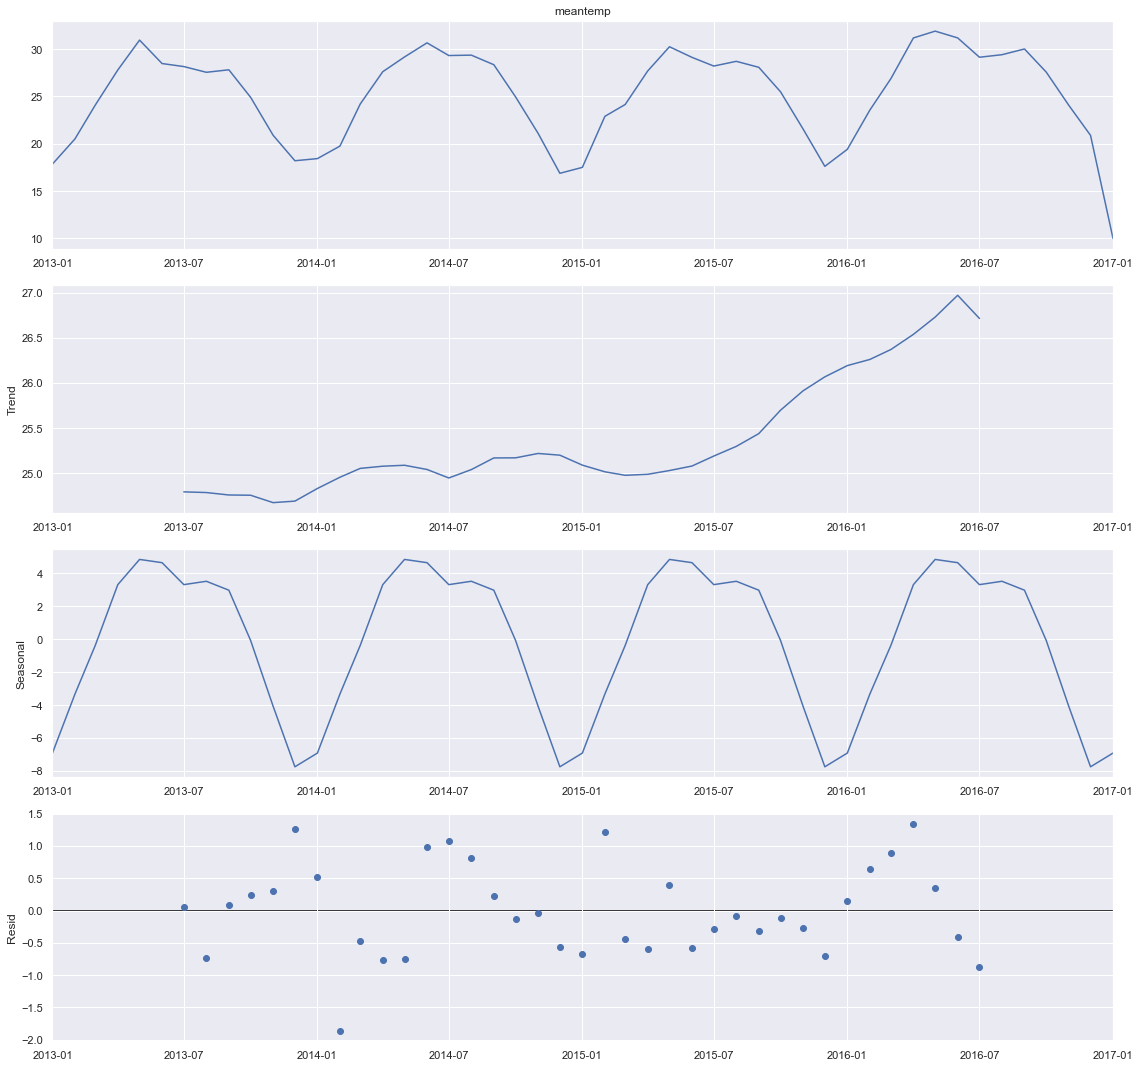

In [41]:
from pylab import rcParams
rcParams["figure.figsize"]=16,15
decomposition=sm.tsa.seasonal_decompose(y)
fig=decomposition.plot()
plt.show()

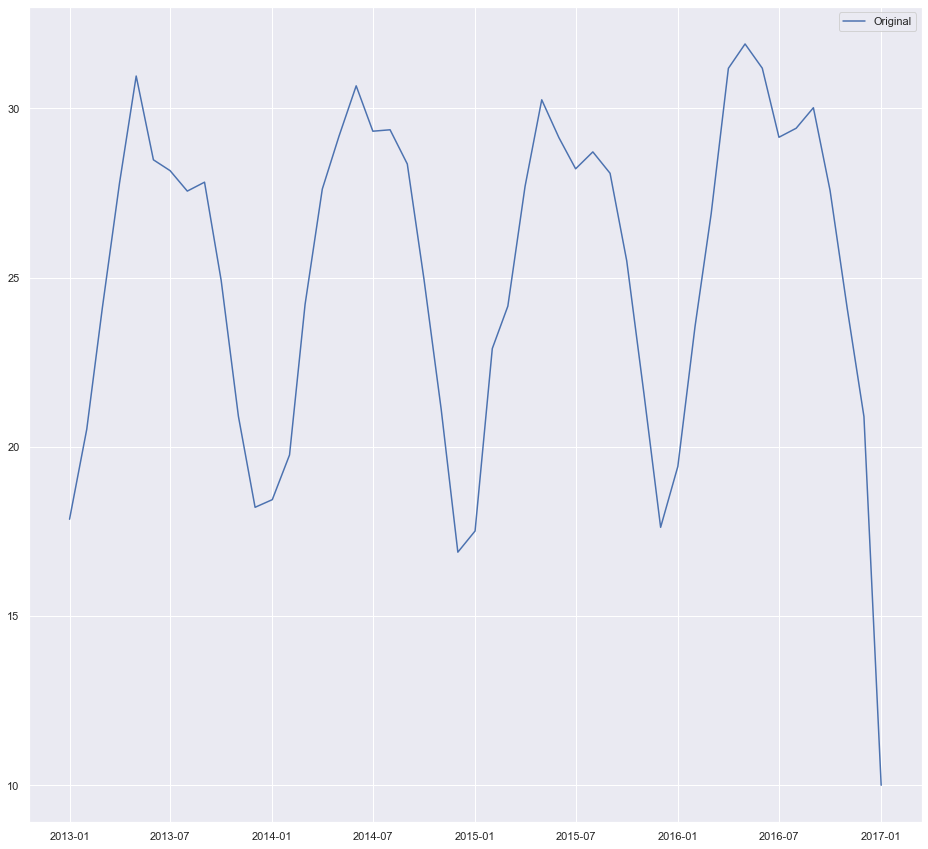

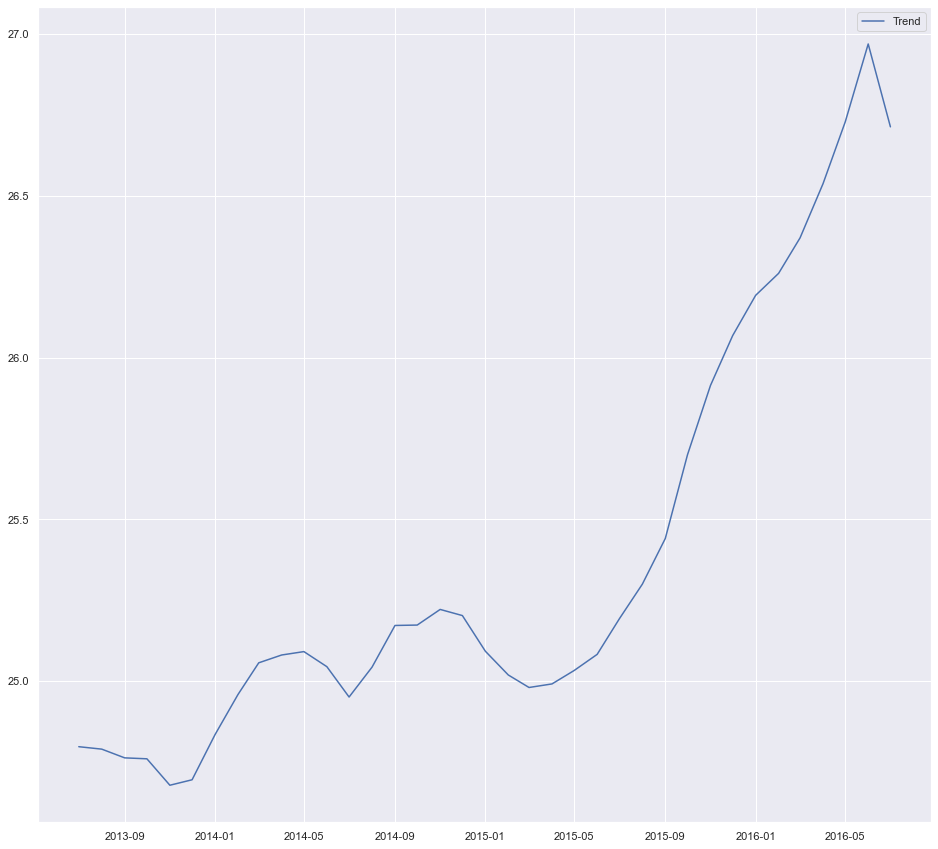

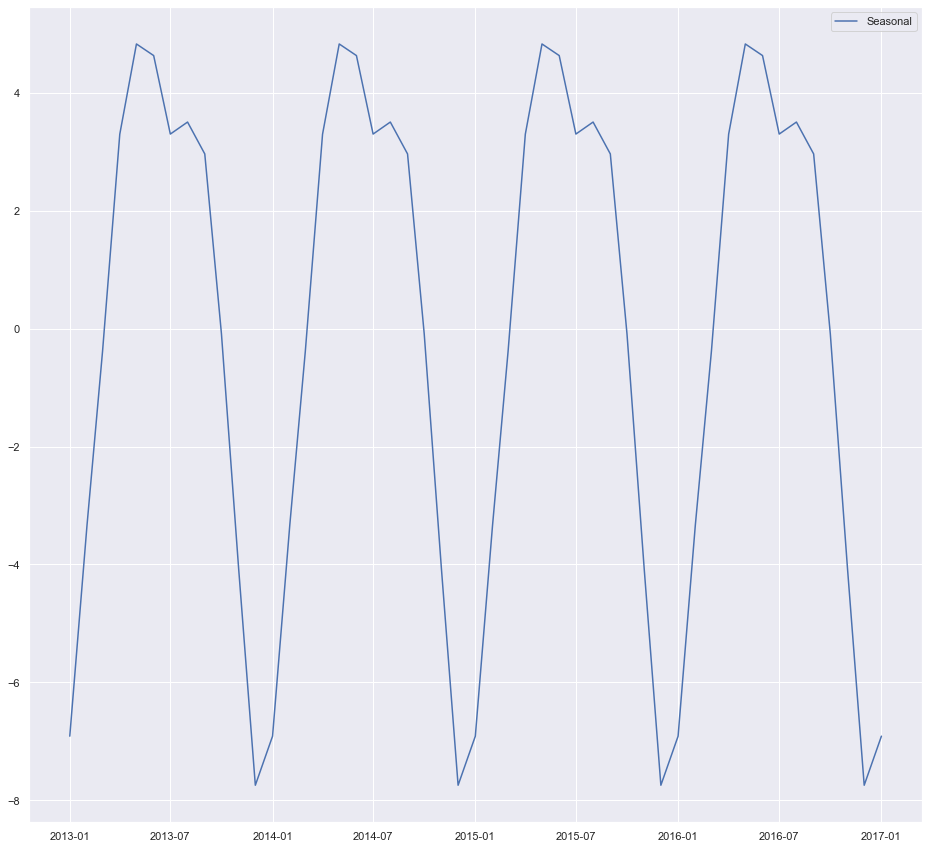

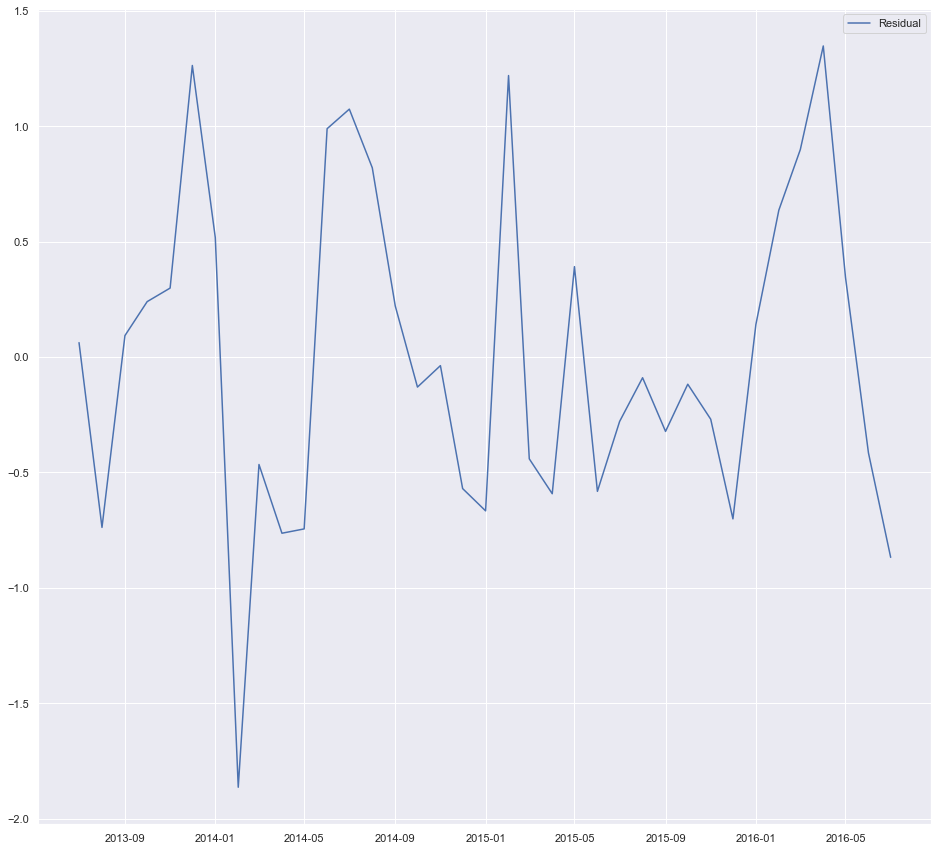

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompostition=seasonal_decompose(y)
plt.plot(y,label="Original")
plt.legend(loc="best")

trend=decomposition.trend
plt.show()
plt.plot(trend,label="Trend")
plt.legend(loc="best")

seasonal=decomposition.seasonal
plt.show()
plt.plot(seasonal,label="Seasonal")
plt.legend(loc="best")

residual=decomposition.resid
plt.show()
plt.plot(residual,label="Residual")
plt.legend(loc="best")


In [43]:
from statsmodels.tsa.stattools import  adfuller

In [44]:
from pandas import Series
from statsmodels.tsa.stattools import  adfuller
result=adfuller(y)
print("ADF Statistic: %F" % result[0])
print("p-value:%f" % result[1])
print("critical values:")
for key,value in result[4].items():
    print('\t%s: %.3f'%(key,value))

ADF Statistic: -2.236960
p-value:0.193106
critical values:
	1%: -3.610
	5%: -2.939
	10%: -2.608


1.null hypothesis: it is not stationry


2.alternative hypothesis:it is stationary

p-value is greater than level of significance .we accept the null hypothesis

##ARIMA

In [45]:
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print("examples of parameter combinations for seasonal arima..")
print("SARIMAX:{} x {}".format(pdq[1],seasonal_pdq[1]))
print("SARIMAX:{} x {}".format(pdq[1],seasonal_pdq[2]))
print("SARIMAX:{} x {}".format(pdq[2],seasonal_pdq[3]))
print("SARIMAX:{} x {}".format(pdq[2],seasonal_pdq[4]))

examples of parameter combinations for seasonal arima..
SARIMAX:(0, 0, 1) x (0, 0, 1, 12)
SARIMAX:(0, 0, 1) x (0, 1, 0, 12)
SARIMAX:(0, 1, 0) x (0, 1, 1, 12)
SARIMAX:(0, 1, 0) x (1, 0, 0, 12)


In [46]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results=mod.fit()
            print('ARIMA{}x{}12-AIC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12-AIC:450.1809169033939
ARIMA(0, 0, 0)x(0, 0, 1, 12)12-AIC:318.5333622096792
ARIMA(0, 0, 0)x(0, 1, 0, 12)12-AIC:161.73356657196445
ARIMA(0, 0, 0)x(0, 1, 1, 12)12-AIC:1242.0161603286629
ARIMA(0, 0, 0)x(1, 0, 0, 12)12-AIC:165.05883131210737
ARIMA(0, 0, 0)x(1, 0, 1, 12)12-AIC:160.51068651550443
ARIMA(0, 0, 0)x(1, 1, 0, 12)12-AIC:118.25790819929153
ARIMA(0, 0, 0)x(1, 1, 1, 12)12-AIC:116.62706230679707
ARIMA(0, 0, 1)x(0, 0, 0, 12)12-AIC:382.98235780177157
ARIMA(0, 0, 1)x(0, 0, 1, 12)12-AIC:313.40832798110745
ARIMA(0, 0, 1)x(0, 1, 0, 12)12-AIC:159.71206622400746
ARIMA(0, 0, 1)x(0, 1, 1, 12)12-AIC:1281.8005241352926
ARIMA(0, 0, 1)x(1, 0, 0, 12)12-AIC:167.10493543629153
ARIMA(0, 0, 1)x(1, 0, 1, 12)12-AIC:159.29142687397763
ARIMA(0, 0, 1)x(1, 1, 0, 12)12-AIC:119.12355805950334
ARIMA(0, 0, 1)x(1, 1, 1, 12)12-AIC:112.55220861105076
ARIMA(0, 1, 0)x(0, 0, 0, 12)12-AIC:241.85699761975914
ARIMA(0, 1, 0)x(0, 0, 1, 12)12-AIC:1479.5366387070255
ARIMA(0, 1, 0)x(0, 1, 0, 12)12

In [47]:
mod=sm.tsa.statespace.SARIMAX(y,order=(0,1,1),seasonal_order=(0,1,1,12),enforce_inveribility=False)
results=mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9990      9.558     -0.105      0.917     -19.732      17.734
ma.S.L12      -0.3570      0.867     -0.412      0.681      -2.056       1.342
sigma2         4.1592     40.739      0.102      0.919     -75.687      84.006


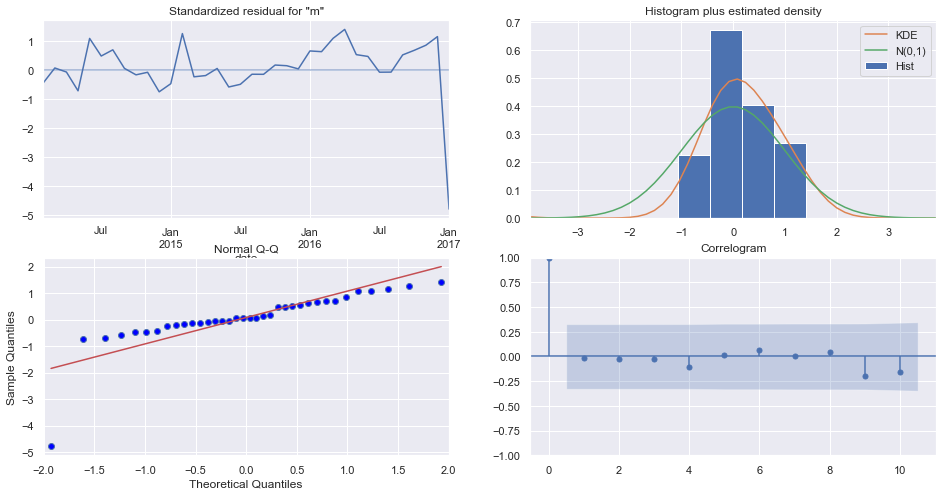

In [48]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

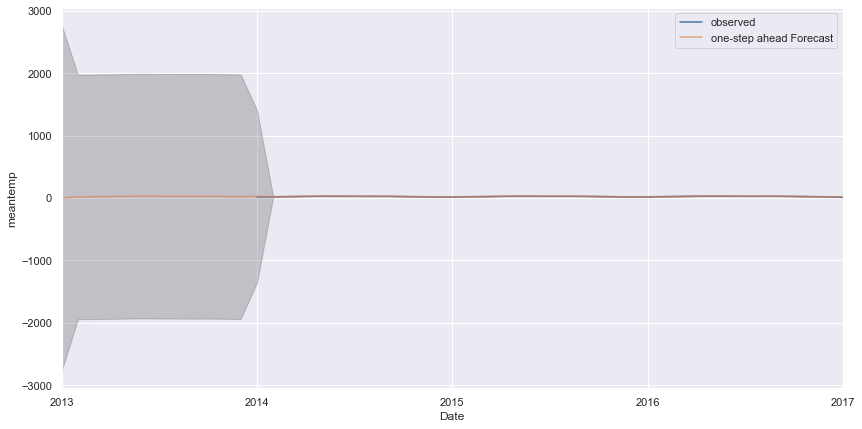

In [56]:
pred=results.get_prediction(start=pd.to_datetime("2013-01-01"),dynamic=False)
pred_ci=pred.conf_int()
ax=y["2014":].plot(label="observed")
pred.predicted_mean.plot(ax=ax,label="one-step ahead Forecast",alpha=.7,figsize=(14,7))
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color="k",alpha=.2)
ax.set_xlabel("Date")
ax.set_ylabel("meantemp")
plt.legend()
plt.show()

            lower meantemp  upper meantemp
2017-02-28       19.610025       27.756206
2017-03-31       22.563378       30.709563
2017-04-30       26.586066       34.732255
2017-05-31       27.898667       36.044859
2017-06-30       27.208068       35.354265
2017-07-31       25.554971       33.701172
2017-08-31       25.821747       33.967952
2017-09-30       25.989759       34.135968
2017-10-31       23.411759       31.557972
2017-11-30       19.765069       27.911287
2017-12-31       16.334852       24.481073
2018-01-31        9.808375       17.958192
2018-02-28       19.228864       29.084124
2018-03-31       22.182215       32.037484
2018-04-30       26.204900       36.060178
2018-05-31       27.517498       37.372785
2018-06-30       26.826897       36.682193
2018-07-31       25.173797       35.029103
2018-08-31       25.440571       35.295885
2018-09-30       25.608580       35.463903


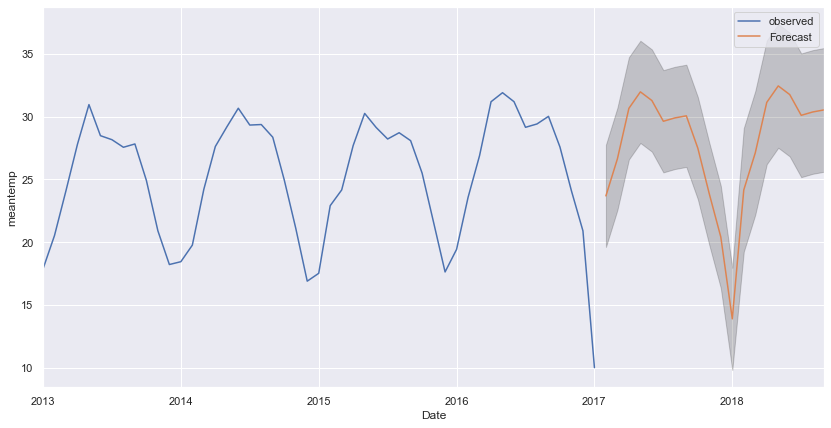

In [29]:
pred_uc=results.get_forecast(steps=20)
pred_ci=pred_uc.conf_int()
ax=y.plot(label="observed",figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label="Forecast")
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color="k",alpha=.2)
ax.set_xlabel("Date")
ax.set_ylabel("meantemp")
print(pred_ci)
plt.legend()
plt.show()